<a href="https://colab.research.google.com/github/PTson2207/Classification-heartcsv/blob/main/classification_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DataVIZ/DatViz/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
y = df.target
X = df.drop(['target'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

    Baseline Prediction

In [7]:
dummy_clf = DummyClassifier(strategy='stratified')

In [8]:
dummy_clf.fit(X_train, y_train)


DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [9]:
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5245901639344263

    Logistic Regression

In [10]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred = log.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
f1_score = metrics.f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

In [12]:
print('Test accuracy score:', acc_score)
print('Test F1 score:', f1_score)
print("COnfusion Matrix")
print(conf_matrix)
print('\n')
print(classification_report(y_test, pred))

Test accuracy score: 0.8524590163934426
Test F1 score: 0.8732394366197184
COnfusion Matrix
[[21  6]
 [ 3 31]]


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



    KNN

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
knn_pred = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test, knn_pred)
knn_f1_score = metrics.f1_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

In [15]:
print('Test accuracy score:', knn_score)
print('Test F1 score:', knn_f1_score)
print("Confusion Matrix")
print(knn_conf_matrix)
print('\n')
print(classification_report(y_test, knn_pred))

Test accuracy score: 0.819672131147541
Test F1 score: 0.8405797101449276
Confusion Matrix
[[21  6]
 [ 5 29]]


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



    DecisionTree Classifier

In [16]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
pred_tree = tree.predict(X_test)
acc_score_tree = metrics.accuracy_score(y_test, pred_tree)
f1_score_tree = metrics.f1_score(y_test, pred_tree)
conf_matrix_tree = confusion_matrix(y_test, pred_tree)

In [18]:
print('Test accuracy score:', acc_score_tree)
print('Test F1 score:', f1_score_tree)
print('confusion matrix')
print(conf_matrix_tree)
print('\n')
print(classification_report(y_test, pred_tree))

Test accuracy score: 0.7704918032786885
Test F1 score: 0.78125
confusion matrix
[[22  5]
 [ 9 25]]


              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.74      0.78        34

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



    Random Forest

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = rfc.predict(X_test)
rfc_acc_score = metrics.accuracy_score(y_test, y_pred)
rfc_f1_score = metrics.f1_score(y_test, y_pred)
rfc_conf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
print('Test accuracy score:', rfc_acc_score)
print('Test F1 score:', rfc_f1_score)
print('Confusion Matrix')
print(rfc_conf_matrix)
print('\n')
print(classification_report(y_test, y_pred))

Test accuracy score: 0.8360655737704918
Test F1 score: 0.8484848484848485
Confusion Matrix
[[23  4]
 [ 6 28]]


              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



    XGB

In [22]:
xg_cl = xgb.XGBClassifier()
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score = metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1_score = metrics.f1_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

In [24]:
print("Test accuracy score:", xgb_acc_score)
print('Test F1 score:', xgb_f1_score)
print('Confusion Matrix')
print(xgb_conf_matrix)
print('\n')
print(classification_report(y_test, y_pred_xgb))

Test accuracy score: 0.8524590163934426
Test F1 score: 0.8695652173913043
Confusion Matrix
[[22  5]
 [ 4 30]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



    Naive Bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
y_pred_nb = nb.predict(X_test)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score = metrics.f1_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

In [27]:
print('Test accuracy score:', nb_acc_score)
print('Test f1 score:', nb_f1_score)
print('Confusion Matrix')
print(nb_conf_matrix)
print('\n')
print(classification_report(y_test, y_pred_nb))

Test accuracy score: 0.8524590163934426
Test f1 score: 0.8732394366197184
Confusion Matrix
[[21  6]
 [ 3 31]]


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



    Support Vector Classifier

In [28]:
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y_pred_svc = svc.predict(X_test)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

In [30]:
print('Test accuracy score:', svc_acc_score)
print('Test f1 score:', svc_f1_score)
print('Confusion Matrix')
print(svc_conf_matrix)
print('\n')
print(classification_report(y_test, y_pred_svc))

Test accuracy score: 0.8852459016393442
Test f1 score: 0.8985507246376812
Confusion Matrix
[[23  4]
 [ 3 31]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



    Feature importance viz

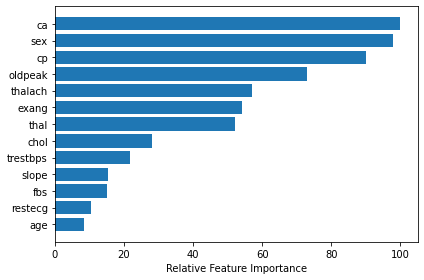

In [31]:
feature_importance = abs(log.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

    Model Evaluation

In [32]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier'],
                    'Accuracy':[acc_score,
                    rfc_acc_score,xgb_acc_score,knn_score,acc_score_tree,nb_acc_score, svc_acc_score]})

In [33]:
model_ev

,Model,Accuracy
0,Logistic Regression,0.852459
1,Random Forest,0.836066
2,Extreme Gradient Boost,0.852459
3,K-Nearest Neighbour,0.819672
4,Decision Tree,0.770492
5,Naive Bayes,0.852459
6,Support Vector Classifier,0.885246
